In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r'C:\Users\Dell\Desktop\Jupyter Notebook\Book1.xlsx',index_col='DATE',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)

Shape of data (1821, 5)


In [3]:
df['AvgTemp'] = df['AvgTemp'].astype(int)

In [4]:
df

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40,657,1756
2014-02-01,35.0,50.0,43,657,1756
2014-03-01,36.0,45.0,41,657,1757
2014-04-01,32.0,41.0,37,658,1757
2014-05-01,24.0,38.0,31,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40,654,1752
2018-12-27,33.0,44.0,39,655,1752
2018-12-28,33.0,47.0,40,655,1753


Text(0, 0.5, 'Average Temperature')

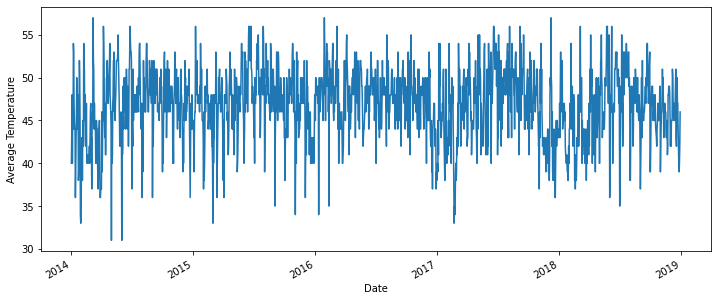

In [5]:
df1=df['AvgTemp'].plot(figsize=(12,5))
df1.set_xlabel("Date")
df1.set_ylabel("Average Temperature")

In [6]:
train_set=df.iloc[:,2:3].values
train_set

array([[40],
       [43],
       [41],
       ...,
       [40],
       [42],
       [46]])

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train=scaler.fit_transform(train_set)
scaled_train

array([[0.34615385],
       [0.46153846],
       [0.38461538],
       ...,
       [0.34615385],
       [0.42307692],
       [0.57692308]])

In [8]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [9]:
len(scaled_train)

1821

In [10]:
X_train=scaled_train[0:1792]
y_train=scaled_train[1:1793]

In [11]:
X_train=np.reshape(X_train,(1792,1,1))
X_train

array([[[0.34615385]],

       [[0.46153846]],

       [[0.38461538]],

       ...,

       [[0.65384615]],

       [[0.53846154]],

       [[0.5       ]]])

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [13]:
model = Sequential()
model.add(LSTM(4, activation='sigmoid', input_shape=(None,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train,y_train,batch_size=20,epochs=100)

Epoch 1/100
90/90 [==============================] - 2s 2ms/step - loss: 1.6374
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 1.1311
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 0.7861
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5482
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3827
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 0.2670
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.1864
Epoch 8/100
90/90 [==============================] - 0s 2ms/step - loss: 0.1307
Epoch 9/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0925
Epoch 10/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0670
Epoch 11/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 12/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0396
Epoch 13/100
90/90 [=================

In [16]:
real_avg_temp=df.iloc[1794:,2:3].values
real_avg_temp

array([[48],
       [45],
       [44],
       [45],
       [44],
       [45],
       [46],
       [47],
       [47],
       [45],
       [46],
       [47],
       [49],
       [51],
       [43],
       [42],
       [48],
       [50],
       [47],
       [47],
       [44],
       [42],
       [40],
       [39],
       [40],
       [42],
       [46]])

In [17]:
inputs=scaler.fit_transform(real_avg_temp)
inputs

array([[0.75      ],
       [0.5       ],
       [0.41666667],
       [0.5       ],
       [0.41666667],
       [0.5       ],
       [0.58333333],
       [0.66666667],
       [0.66666667],
       [0.5       ],
       [0.58333333],
       [0.66666667],
       [0.83333333],
       [1.        ],
       [0.33333333],
       [0.25      ],
       [0.75      ],
       [0.91666667],
       [0.66666667],
       [0.66666667],
       [0.41666667],
       [0.25      ],
       [0.08333333],
       [0.        ],
       [0.08333333],
       [0.25      ],
       [0.58333333]])

In [18]:
len(inputs)

27

In [19]:
np.reshape(inputs,(27,1,1))

array([[[0.75      ]],

       [[0.5       ]],

       [[0.41666667]],

       [[0.5       ]],

       [[0.41666667]],

       [[0.5       ]],

       [[0.58333333]],

       [[0.66666667]],

       [[0.66666667]],

       [[0.5       ]],

       [[0.58333333]],

       [[0.66666667]],

       [[0.83333333]],

       [[1.        ]],

       [[0.33333333]],

       [[0.25      ]],

       [[0.75      ]],

       [[0.91666667]],

       [[0.66666667]],

       [[0.66666667]],

       [[0.41666667]],

       [[0.25      ]],

       [[0.08333333]],

       [[0.        ]],

       [[0.08333333]],

       [[0.25      ]],

       [[0.58333333]]])

In [20]:
Pred_temp=model.predict(inputs)
Pred_temp

1/1 [==============================] - 0s 174ms/step


array([[0.7169938 ],
       [0.5346627 ],
       [0.4649942 ],
       [0.5346627 ],
       [0.4649942 ],
       [0.5346627 ],
       [0.60010695],
       [0.6609521 ],
       [0.6609521 ],
       [0.5346627 ],
       [0.60010695],
       [0.6609521 ],
       [0.76818264],
       [0.8564246 ],
       [0.39165288],
       [0.3153575 ],
       [0.7169938 ],
       [0.8145988 ],
       [0.6609521 ],
       [0.6609521 ],
       [0.4649942 ],
       [0.3153575 ],
       [0.15745407],
       [0.07782871],
       [0.15745407],
       [0.3153575 ],
       [0.60010695]], dtype=float32)

In [21]:
Pred_avg_temp=scaler.inverse_transform(Pred_temp)
Pred_avg_temp

array([[47.603928],
       [45.415955],
       [44.57993 ],
       [45.415955],
       [44.57993 ],
       [45.415955],
       [46.201283],
       [46.931427],
       [46.931427],
       [45.415955],
       [46.201283],
       [46.931427],
       [48.218193],
       [49.2771  ],
       [43.699833],
       [42.78429 ],
       [47.603928],
       [48.77519 ],
       [46.931427],
       [46.931427],
       [44.57993 ],
       [42.78429 ],
       [40.88945 ],
       [39.933945],
       [40.88945 ],
       [42.78429 ],
       [46.201283]], dtype=float32)

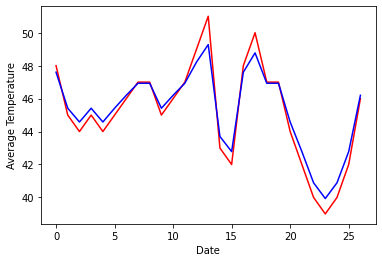

In [22]:
plt.plot(real_avg_temp,color='red',label='Real Average Temperature')
plt.plot(Pred_avg_temp,color='blue',label='Predicted Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(real_avg_temp,Pred_avg_temp))
print(rmse)

0.6674771657084253


In [ ]:
n1=df['AvgTemp'].iloc[[1820]].values
n1=np.array(n1).reshape(-1,1)
print("Predicting Average Temperature for next 30 days:-\n")
for i in range(30):
    n2=scaler.transform(n1)
    V=n2.reshape(-1,1,1)
    Val=model.predict(V)
    final=scaler.inverse_transform(Val)
    print("Predicted Average Temperature",final)
    n1=final